# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Data Preparation

## 1- Descriptive Analysis

In [2]:
# Loading the data file
higher_education_df = pd.read_csv('Data/Education.csv')
higher_education_df.head(3)

,student id,Gender,Aptitude Test,GRE Score,University Ranking,GPA Range,Out of State Flag,Housing,Non-Traditional Student,Campus Name,Program,Session,Race,Country,Financial Aid,Transfer Student,Full-Time
0,046-46-0144,Male,GRE,308.0,Pass,2.50-2.99,Yes,Off-Campus,No,Southern Arkansas University,IELP,FA21,Asian,China,No,No,Yes
1,571-27-9819,Female,GRE,329.0,Top Quarter,3.00-3.24,No,College Owned/Operated,No,Campbellsville UniversityCampbellsville Univer...,IELP/TESOL,SP22,Asian,Pakistan,Yes,No,Yes
2,080-49-9674,Female,GRE,295.0,Pass,3.00-3.24,Yes,Off-Campus,No,International Language Academy of Washington D...,IELP/EDUC,SM22,Kinh,Vietnam,No,No,Yes


### 1.1- Exploratory Data Analysis(EDA)

In [5]:
# Function to perform all EDA
def eda(df, name=""):
    # Displaying basic details
    print(f"EDA of {name} Dataset is........")
    print(f"Size: {df.size}")
    print(f"Columns: {df.shape[1]}")
    print(f"Records: {df.shape[0]}")
    print("*"*50, "\n")
    
    # Displayng Top 4 records of Data
    print("First Look of Data: ")
    display(df.head())
    print("*"*50, "\n")
    
    # Getting Numerical columns and Categorical columns
    cat_col = df.select_dtypes(object).columns
    num_col = df.select_dtypes(np.number).columns
    
    # Displaying the Numerical Columns
    print("Dataset has following Numerical Columns: ")
    if len(num_col) == 0:
        print('''\t"No Numerical Column exist."''', "\n")
    else:
        for i, j in enumerate(num_col):
            print(f"{i+1}- {j}")
    
    # Displaying the Categorical Columns
    print("Dataset has following Categorical Columns: ")
    if len(cat_col) == 0:
        print("\tNo Categorical Column exist.")
    else:
        for i, j in enumerate(cat_col):
            print(f"{i+1}- {j}")
    print("*"*50, "\n")
    
    # Displaying info of Data e.g., Null values, data types etc
    print("Information of Data is as follows: ")
    display(df.info())
    print("*"*50, "\n")
    
    # Displaying Statistical properties
    print("Statistical Properties of Data: ")
    display(df.describe(include="all"))
    print("*"*50, "\n")
    
    # Displaying corelation of Numerical features
    corr = df.corr(method="kendall").style.background_gradient("YlOrRd_r")
    print("Correlation of Numerical Features...")
    display(corr)
    print("*"*50, "\n")

In [6]:
eda(higher_education_df, "Higher Education")

EDA of Higher Education Dataset is........
Size: 66011
Columns: 17
Records: 3883
************************************************** 

First Look of Data: 


,student id,Gender,Aptitude Test,GRE Score,University Ranking,GPA Range,Out of State Flag,Housing,Non-Traditional Student,Campus Name,Program,Session,Race,Country,Financial Aid,Transfer Student,Full-Time
0,046-46-0144,Male,GRE,308.0,Pass,2.50-2.99,Yes,Off-Campus,No,Southern Arkansas University,IELP,FA21,Asian,China,No,No,Yes
1,571-27-9819,Female,GRE,329.0,Top Quarter,3.00-3.24,No,College Owned/Operated,No,Campbellsville UniversityCampbellsville Univer...,IELP/TESOL,SP22,Asian,Pakistan,Yes,No,Yes
2,080-49-9674,Female,GRE,295.0,Pass,3.00-3.24,Yes,Off-Campus,No,International Language Academy of Washington D...,IELP/EDUC,SM22,Kinh,Vietnam,No,No,Yes
3,956-46-6295,Female,GRE,300.0,Pass,3.25-3.49,Yes,Off-Campus,No,Piedmont Technical College,MSASA,SM22,Asian,India,No,No,Yes
4,784-70-5844,Female,GRE,334.0,Pass,3.25-3.49,Yes,Off-Campus,No,University of New Haven,IELP/MSASA,FA21,African,Congo,No,No,Yes


************************************************** 

Dataset has following Numerical Columns: 
1- GRE Score
Dataset has following Categorical Columns: 
1- student id
2- Gender
3- Aptitude Test
4- University Ranking
5- GPA Range
6- Out of State Flag
7- Housing
8- Non-Traditional Student
9- Campus Name
10- Program
11- Session
12- Race
13- Country
14- Financial Aid
15- Transfer Student
16- Full-Time
************************************************** 

Information of Data is as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student id               3883 non-null   object 
 1   Gender                   3883 non-null   object 
 2   Aptitude Test            3883 non-null   object 
 3   GRE Score                3883 non-null   float64
 4   University Ranking       3883 non-null   object 
 5   GPA Range            

None

************************************************** 

Statistical Properties of Data: 


,student id,Gender,Aptitude Test,GRE Score,University Ranking,GPA Range,Out of State Flag,Housing,Non-Traditional Student,Campus Name,Program,Session,Race,Country,Financial Aid,Transfer Student,Full-Time
count,3883,3883,3883,3883.000000,3883,3883,3883,3883,3883,3883,3883,3883,3883,3883,3883,3883,3883
unique,3883,4,1,NaN,6,7,2,2,2,112,23,4,13,17,2,2,2
top,046-46-0144,Male,GRE,NaN,Pass,3.00-3.24,No,College Owned/Operated,No,Rockford UniversityRockford University,IELP,FA22,Arabs,Nepal,Yes,No,Yes
freq,1,1972,3883,NaN,1724,1045,2233,2196,3733,51,187,1003,698,267,2066,2689,2260
mean,NaN,NaN,NaN,312.344836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,13.182382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,290.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,313.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


************************************************** 

Correlation of Numerical Features...


,GRE Score
GRE Score,1.000000


************************************************** 



### 1.2 Data Visualization

- __Country VS Transfer Students__

In [7]:
# Getting data ready for Country VS Transfer Student Bar Chart
country = higher_education_df['Country']
trasfer_students = higher_education_df['Transfer Student']
unique_country = higher_education_df['Country'].unique()
# unique_country = unique_country[0:7]
transfer_yes = []
transfer_no = []
for x in unique_country:
    count_yes = 0
    count_no = 0
    for i in range(len(country)):
        if x == country[i]:
            if trasfer_students[i].lower() == 'yes':
                count_yes += 1
            elif trasfer_students[i].lower() == 'no':
                count_no += 1

    transfer_yes.append(count_yes)
    transfer_no.append(count_no)

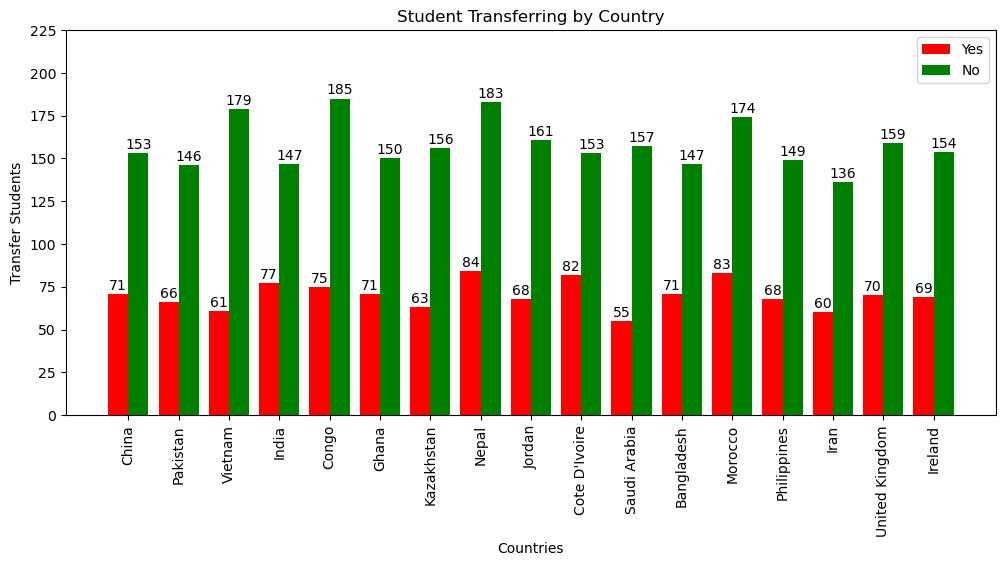

In [8]:
def addlabels(x,y, lim):
    for i in range(len(x)):
        plt.text(i-lim, y[i]+2.5, y[i], ha = 'center')
        
        
fig=plt.figure(figsize=(12,5), dpi= 100, facecolor='w', edgecolor='k')

X_axis = np.arange(len(unique_country))
plt.bar(X_axis - 0.2, transfer_yes, 0.4, color='r' , label="Yes")
plt.bar(X_axis + 0.2, transfer_no, 0.4, color='g', label="No")
addlabels(unique_country, transfer_yes, 0.2)
addlabels(unique_country, transfer_no, -0.2)


plt.xticks(X_axis, unique_country, rotation=90)
plt.ylim(0,225)
plt.xlabel("Countries")
plt.ylabel("Transfer Students")
plt.title("Student Transferring by Country")

plt.legend()
plt.show()

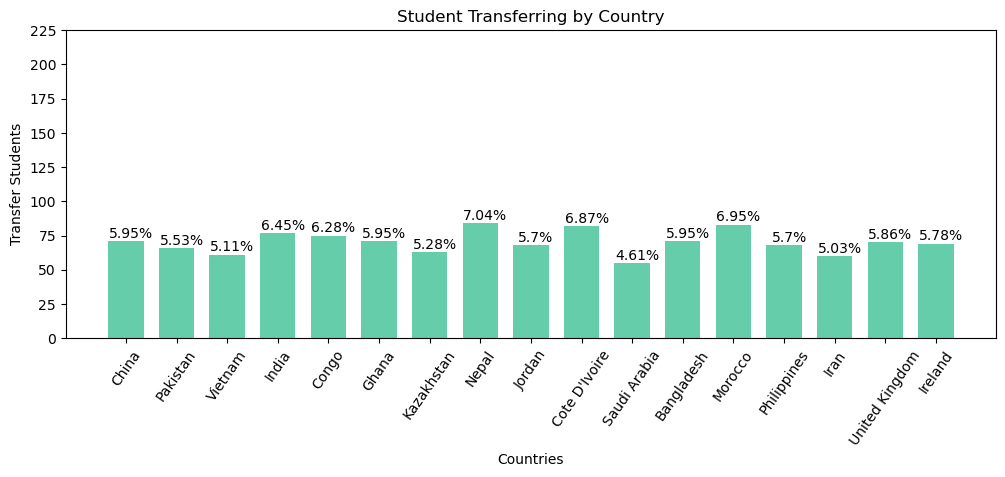

In [9]:
# Transfer Students from each country and their percentage
def percentage(my_list):
    all_percentage= []
    for i,j in enumerate(my_list):
        all_percentage.append(round((j*100)/sum(transfer_yes) ,2))
    return all_percentage
        
        
def addlabels(x,y):
    perc = percentage(transfer_yes)
    for i in range(len(x)):
        plt.text(i+0.1, y[i]+2.5, str(perc[i]) + '%', ha = 'center')

fig=plt.figure(figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')

plt.bar(unique_country, transfer_yes, width = 0.7, color="#66cdaa")
addlabels(unique_country, transfer_yes)
plt.ylim(0,225)

plt.xticks(X_axis, unique_country, rotation=55)
plt.xlabel("Countries")
plt.ylabel("Transfer Students")
plt.title("Student Transferring by Country")

plt.show()

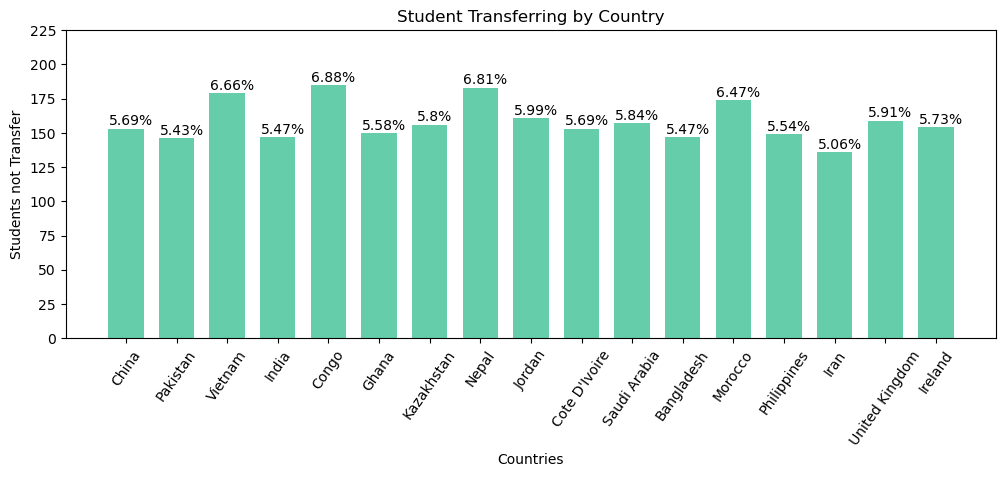

In [10]:
# Students not Transfer from each country and their percentage
def percentage(my_list):
    all_percentage= []
    for i,j in enumerate(my_list):
        all_percentage.append(round((j*100)/sum(transfer_no) ,2))
    return all_percentage
        
        
def addlabels(x,y):
    perc = percentage(transfer_no)
    for i in range(len(x)):
        plt.text(i+0.1, y[i]+2.5, str(perc[i]) + '%', ha = 'center')

fig=plt.figure(figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')

plt.bar(unique_country, transfer_no, width = 0.7, color="#66cdaa")
addlabels(unique_country, transfer_no)
plt.ylim(0,225)

plt.xticks(X_axis, unique_country, rotation=55)
plt.xlabel("Countries")
plt.ylabel("Students not Transfer")
plt.title("Student Transferring by Country")

plt.show()

- __GPA VS Transfer Students__

In [11]:
# Getting data ready for GPA range VS Transfer Student Bar Chart
gpa = higher_education_df['GPA Range']
trasfer_students = higher_education_df['Transfer Student']
unique_gpa = higher_education_df['GPA Range'].unique()
transfer_yes = []
transfer_no = []
for x in unique_gpa:
    count_yes = 0
    count_no = 0
    for i in range(len(gpa)):
        if x == gpa[i]:
            if trasfer_students[i].lower() == 'yes':
                count_yes += 1
            elif trasfer_students[i].lower() == 'no':
                count_no += 1

    transfer_yes.append(count_yes)
    transfer_no.append(count_no)

sorted_gpa = ['1.0-1.99',  '2.0-2.49', '2.50-2.99', '3.00-3.24', '3.25-3.49', '3.50-3.74', '3.75+']
yes = [0, 0, 0, 0, 0, 0, 0]
no = [0, 0, 0, 0, 0, 0, 0]
for i, j in enumerate(unique_gpa):
    for x, y in enumerate(sorted_gpa):
        if j == y:
            yes[x] = transfer_yes[i]
            no[x] = transfer_no[i]
unique_gpa = sorted_gpa
transfer_yes = yes
transfer_no = no

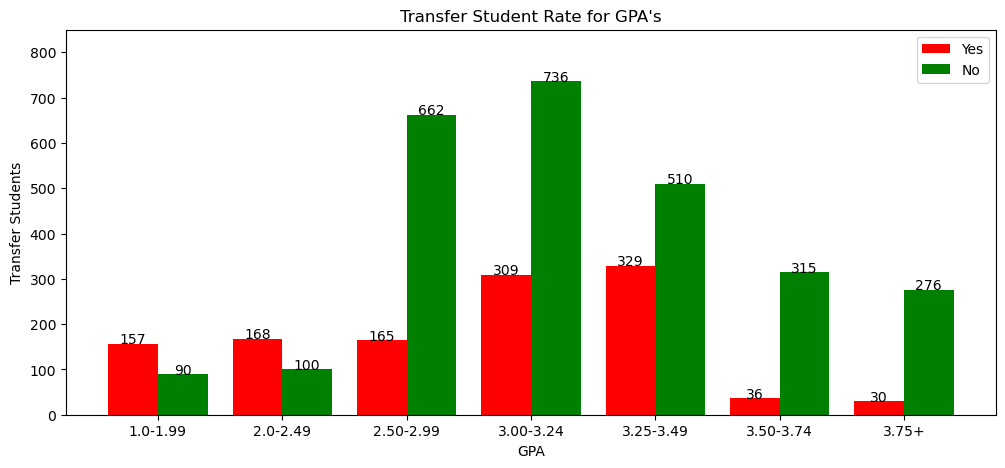

In [12]:
# Creating Bar Chart for GPA range VS Transfer Student Bar Chart
def addlabels(x,y, lim):
    for i in range(len(x)):
        plt.text(i-lim, y[i], y[i], ha = 'center')
        
fig=plt.figure(figsize=(12,5), dpi= 100, facecolor='w', edgecolor='k')

X_axis = np.arange(len(unique_gpa))
plt.bar(X_axis - 0.2, transfer_yes, 0.4, color='r' , label="Yes")
plt.bar(X_axis + 0.2, transfer_no, 0.4, color='g', label="No")
addlabels(unique_gpa, transfer_yes, 0.2)
addlabels(unique_gpa, transfer_no, -0.2)
plt.ylim(0,850)

plt.xticks(X_axis, unique_gpa)
plt.xlabel("GPA")
plt.ylabel("Transfer Students")
plt.title("Transfer Student Rate for GPA's")

plt.legend()
plt.show()

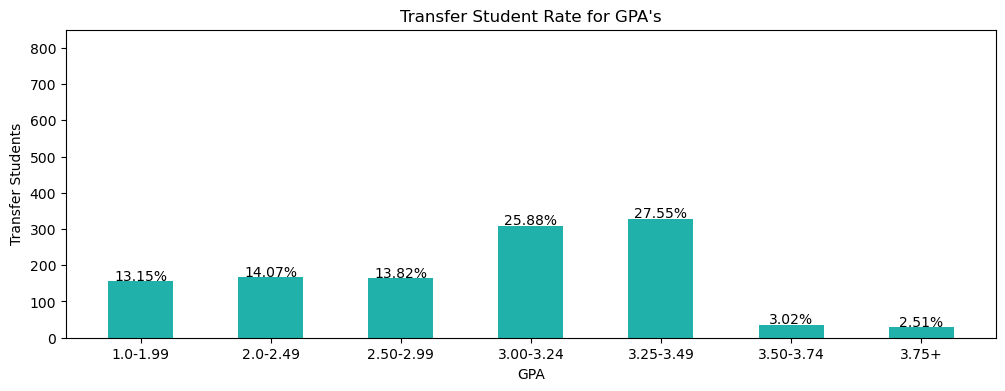

In [13]:
# Creating Bar Chart for GPA range VS Transfer Student Bar Chart
def percentage(my_list):
    all_percentage= []
    for i,j in enumerate(my_list):
        all_percentage.append(round((j*100)/sum(transfer_yes) ,2))
    return all_percentage
        
        
def addlabels(x,y):
    perc = percentage(transfer_yes)
    for i in range(len(x)):
        plt.text(i, y[i]+2.5, str(perc[i]) + '%', ha = 'center')
        

fig=plt.figure(figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')

plt.bar(unique_gpa, transfer_yes, width = 0.5, color="#20b2aa")
addlabels(unique_gpa, transfer_yes)
plt.ylim(0,850)

plt.xlabel("GPA")
plt.ylabel("Transfer Students")
plt.title("Transfer Student Rate for GPA's")

plt.show()

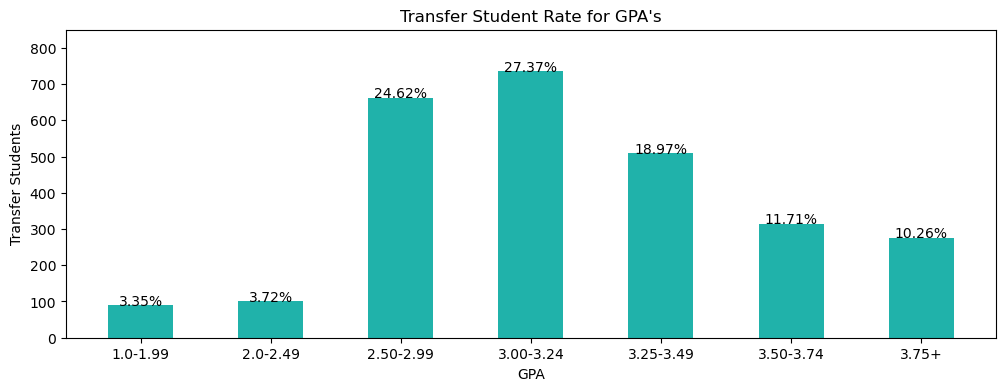

In [14]:
# Creating Bar Chart for GPA range VS Student not Transfer Bar Chart
def percentage(my_list):
    all_percentage= []
    for i,j in enumerate(my_list):
        all_percentage.append(round((j*100)/sum(transfer_no) ,2))
    return all_percentage
        
        
def addlabels(x,y):
    perc = percentage(transfer_no)
    for i in range(len(x)):
        plt.text(i, y[i]+0.01, str(perc[i]) + '%', ha = 'center')
        

fig=plt.figure(figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')

plt.bar(unique_gpa, transfer_no, width = 0.5, color="#20b2aa")
addlabels(unique_gpa, transfer_no)
plt.ylim(0,850)

plt.xlabel("GPA")
plt.ylabel("Transfer Students")
plt.title("Transfer Student Rate for GPA's")

plt.show()

- __Session VS Gender__

In [15]:
# Getting data ready for Session VS Gender Bar Chart
session = higher_education_df['Session']
gender = higher_education_df['Gender']
unique_session = higher_education_df['Session'].unique()
# print(unique_session)
session_male = []
session_female = []
for x in unique_session:
    count_male = 0
    count_female = 0
    for i in range(len(gender)):
        if x == session[i]:
            if gender[i].lower() == 'male':
                count_male += 1
            elif gender[i].lower() == 'female':
                count_female += 1

    session_male.append(count_male)
    session_female.append(count_female)

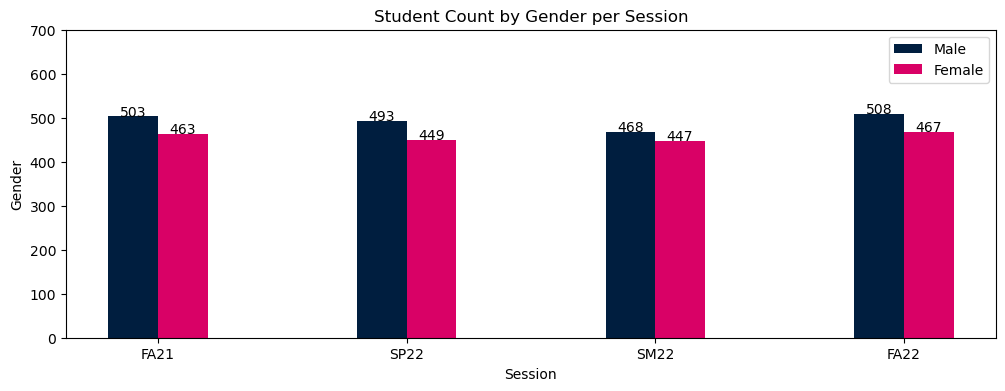

In [16]:
# Creating Bar Chart for Session VS Gender Bar Chart
def addlabels(x,y, lim):
    perc = percentage(transfer_yes)
    for i in range(len(x)):
        plt.text(i-lim, y[i]+1, y[i], ha = 'center')

fig=plt.figure(figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')

X_axis = np.arange(len(unique_session))
plt.bar(X_axis - 0.1, session_male, 0.2, color='#001e3f' , label="Male")
plt.bar(X_axis + 0.1, session_female, 0.2, color='#d90166', label="Female")
addlabels(unique_session, session_male, 0.1)
addlabels(unique_session, session_female, -0.1)
plt.ylim(0, 700)

plt.xticks(X_axis, unique_session)
plt.xlabel("Session")
plt.ylabel("Gender")
plt.title("Student Count by Gender per Session")

plt.legend()
plt.show()

- __All Columns and Their Bar Graphs__

In [17]:
# Finding unique list with count
def create_unique_count(df):
    df = df.value_counts(dropna=False).sort_index(ascending=True).to_frame()
    return df.values, df.index

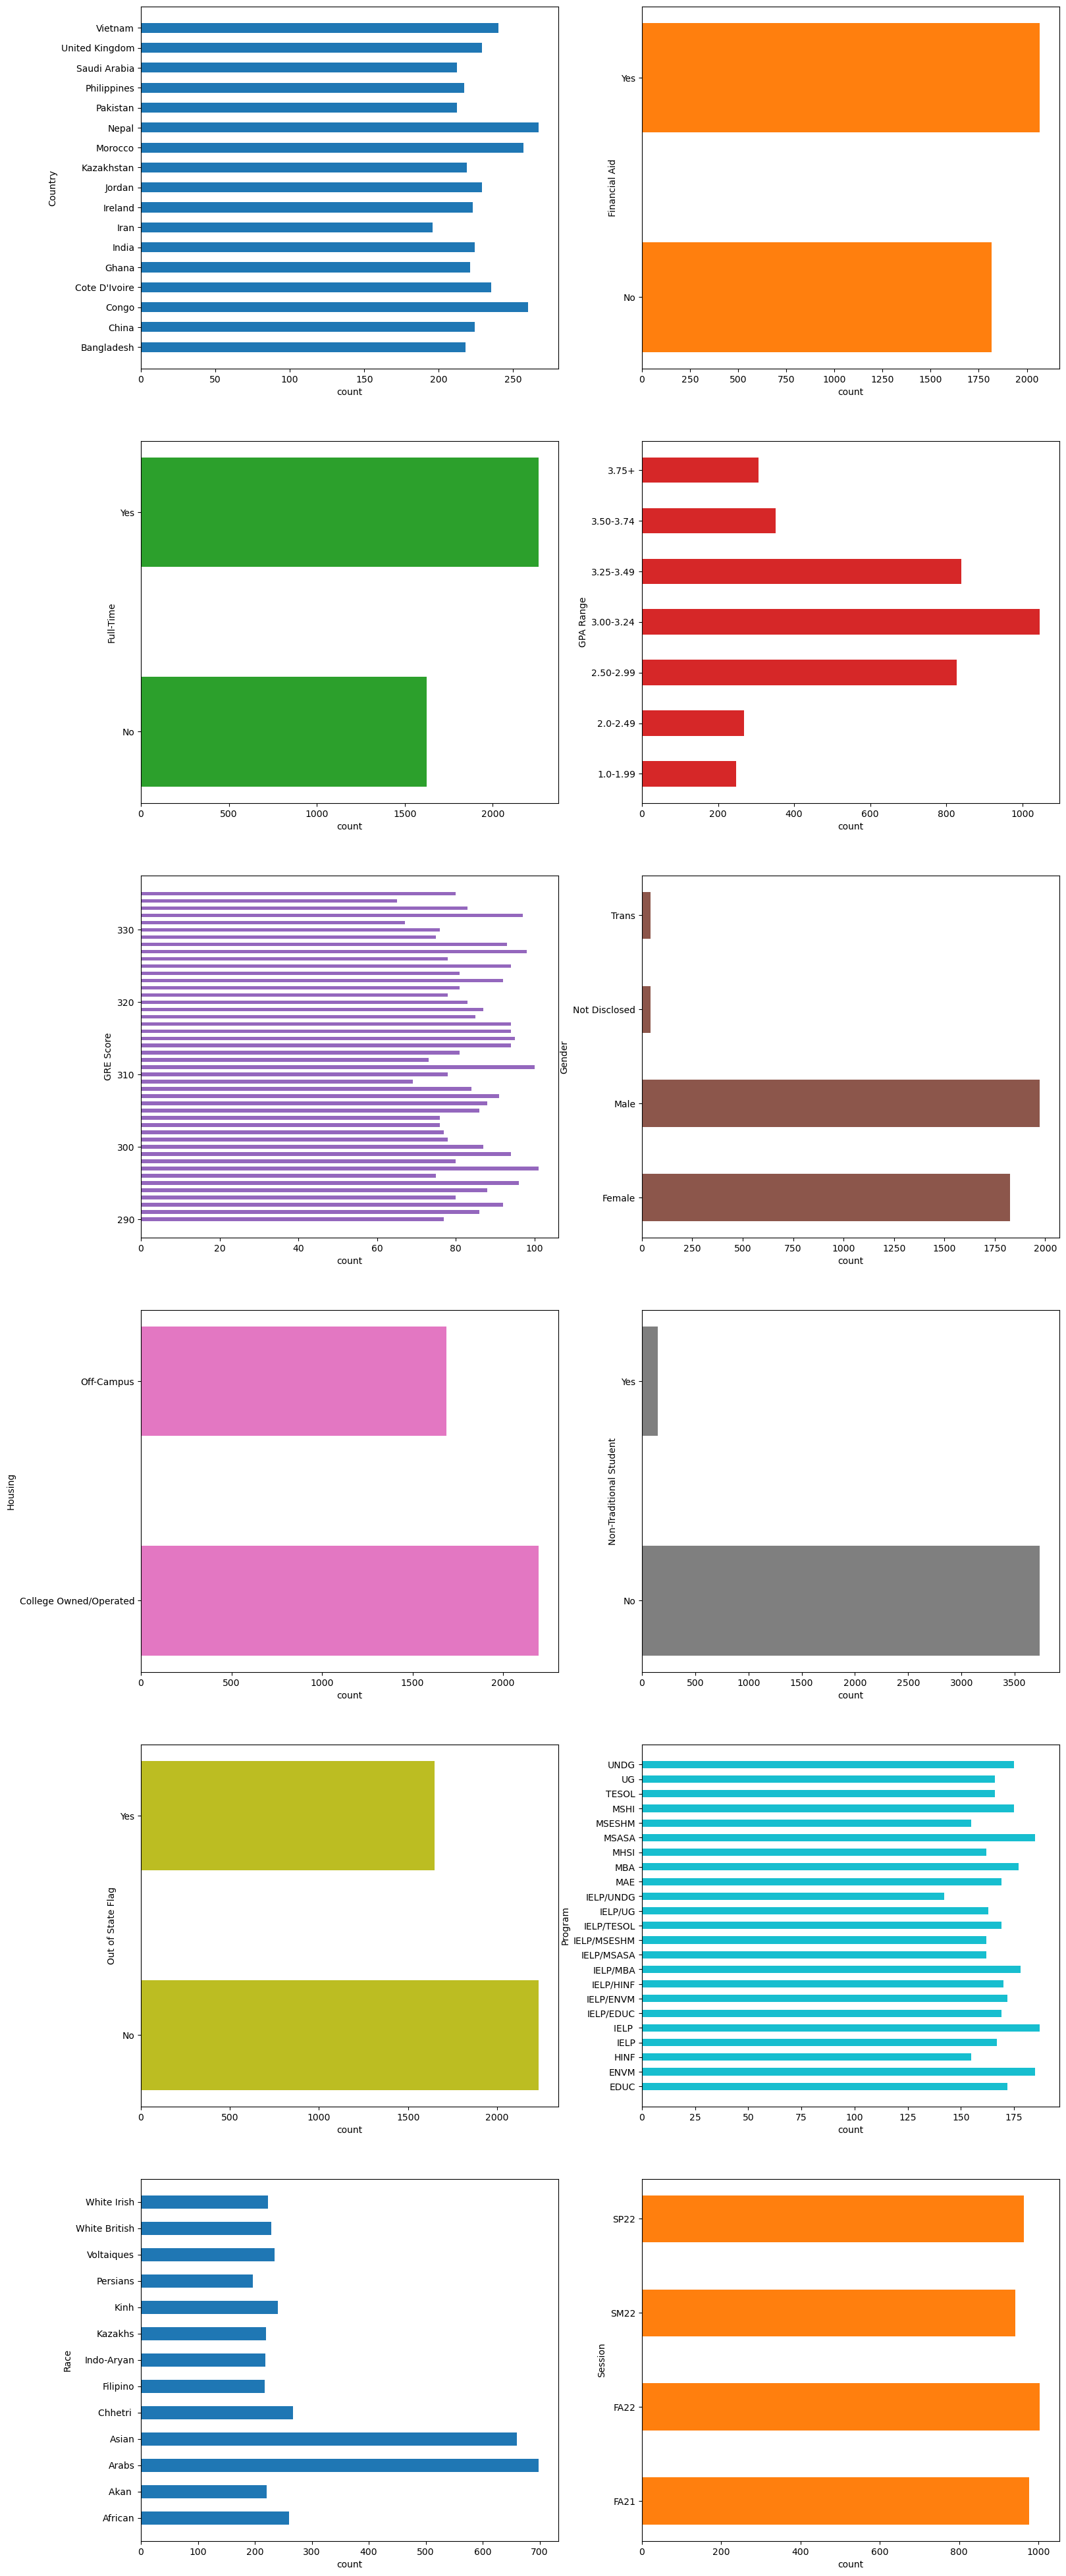

In [18]:
# Creating bar plots for all the columns
colors = plt.rcParams["axes.prop_cycle"]()
selected_columns = sorted(list(higher_education_df.columns[1:]))
selected_columns.remove('Campus Name')
selected_columns.remove('Aptitude Test')
count = 0
fig, axs = plt.subplots(6, 2, figsize=(18,50), dpi= 100, facecolor='w', edgecolor='k')
for i in range(6):
    for j in range(2):
        val, ind = create_unique_count(higher_education_df[selected_columns[count]])
        val = pd.DataFrame(val)
        ind = pd.DataFrame(ind)
        for x, y in enumerate(ind[0]):
            if pd.isnull(y):
                ind[0].loc[x] = 'Null'
        c = next(colors)["color"]
        axs[i, j].barh(ind[0], val[0], 0.5, color=c)
        count = count + 1
        if count >= 13:
            break
count = 0
for ax in axs.flat:
    ax.set(xlabel='count', ylabel=selected_columns[count])
    count += 1
    if count >= 13:
            break

# Data Wrangling

## 1- Finding & Removing Duplicates

In [19]:
# Searching for any Duplicated rows
duplicate = higher_education_df[higher_education_df.duplicated()]
if len(duplicate) == 0:
    print("No duplicate found in Dataframe.")
else:
    print("The duplicated rows are: ")
    display(duplicate)

No duplicate found in Dataframe.


## 2- Finding & Filling Null Values

In [20]:
# Searching for Null Values 
higher_education_df.isnull().sum()

student id                 0
Gender                     0
Aptitude Test              0
GRE Score                  0
University Ranking         0
GPA Range                  0
Out of State Flag          0
Housing                    0
Non-Traditional Student    0
Campus Name                0
Program                    0
Session                    0
Race                       0
Country                    0
Financial Aid              0
Transfer Student           0
Full-Time                  0
dtype: int64

_There are no null values, so we do not need imputation._

# Feature Engineering/ Scaling

## 1- Co-Linearity

In [21]:
# Slliced Datafram: Removing SAT and ACT columns because they have NULL values and no mean to fill them.
# Also removing Student_id column because we are not needing it.
sliced_higher_edu_df = higher_education_df[
    ['Gender',
     'GRE Score',
     'Aptitude Test',
     'University Ranking',
     'GPA Range',
     'Out of State Flag',
     'Housing',
     'Non-Traditional Student',
     'Program', 'Session', 
     'Race', 
     'Country', 
     'Financial Aid',
     'Full-Time',
     'Transfer Student'
    ]
]

In [22]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [23]:
rows= []

for var1 in sliced_higher_edu_df:
    col = []
    for var2 in sliced_higher_edu_df:
        cramers =cramers_V(sliced_higher_edu_df[var1], sliced_higher_edu_df[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
cramer_v_colinearity = pd.DataFrame(cramers_results, columns = sliced_higher_edu_df.columns, index =sliced_higher_edu_df.columns)
cramer_v_colinearity

,Gender,GRE Score,Aptitude Test,University Ranking,GPA Range,Out of State Flag,Housing,Non-Traditional Student,Program,Session,Race,Country,Financial Aid,Full-Time,Transfer Student
Gender,1.00,0.01,NaN,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00
GRE Score,0.01,1.00,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01
Aptitude Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
University Ranking,0.00,0.01,NaN,1.00,0.06,0.57,0.44,0.00,0.00,0.00,0.00,0.00,0.50,0.23,0.39
GPA Range,0.00,0.01,NaN,0.06,1.00,0.16,0.13,0.00,0.01,0.00,0.00,0.00,0.15,0.08,0.12
Out of State Flag,0.00,0.01,NaN,0.57,0.16,1.00,0.47,0.00,0.00,0.00,0.00,0.00,0.33,0.24,0.34
Housing,0.00,0.01,NaN,0.44,0.13,0.47,1.00,0.00,0.00,0.00,0.00,0.00,0.27,0.23,0.34
Non-Traditional Student,0.00,0.01,NaN,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00
Program,0.01,0.01,NaN,0.00,0.01,0.00,0.00,0.01,1.00,0.00,0.01,0.01,0.00,0.00,0.01
Session,0.00,0.01,NaN,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


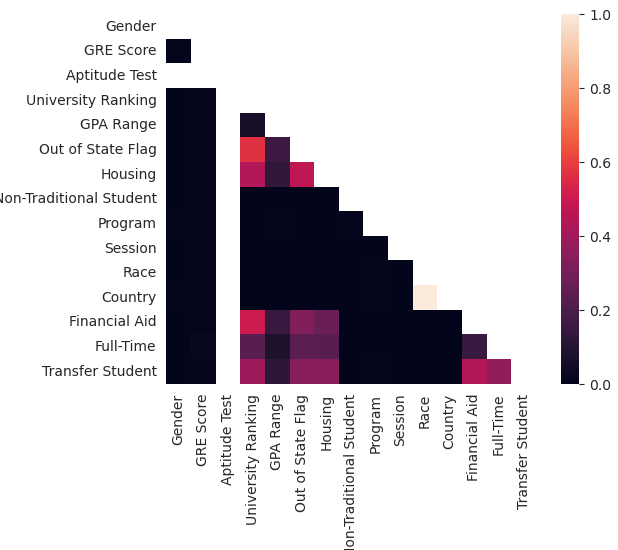

In [25]:
# Creating Heatmap among of the colinearity found using Cramer-V rule.
mask = np.zeros_like(cramer_v_colinearity, dtype=bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(cramer_v_colinearity, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

_As we deducted from Cramer_V rule, No input feature is correlated with each other. We can include all the selected features for OneHot Encoding and then furthur for Predictive Analysis._

## 2- Correlation

In [26]:
from scipy import stats
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [27]:
print("**Correlation Between All Features with Target : Transfer Students**")
left_padding = 80
cramer_v_val_dict = {}
for col in sliced_higher_edu_df:
    cramer_v_val_dict[col] = cramers_v(sliced_higher_edu_df[col], sliced_higher_edu_df['Transfer Student'])

cramer_v_val_dict_sorted = sorted(cramer_v_val_dict.items(), key=lambda x:x[1], reverse=True)

for k,v in cramer_v_val_dict_sorted:
    print(k.ljust(left_padding), v)

# print("**Contract, OnlineSecurity, TechSupport, InternetService are moderately correlated with Churn**")    

**Correlation Between All Features with Target : Transfer Students**
Aptitude Test                                                                    nan
Transfer Student                                                                 0.9993951409430162
Financial Aid                                                                    0.6595486485464435
University Ranking                                                               0.6246012973420141
Full-Time                                                                        0.6113749624110214
Housing                                                                          0.5805390957875938
Out of State Flag                                                                0.5791672080172543
GPA Range                                                                        0.34187418592120566
Session                                                                          0.010446278402498869
Gender                                     

**Cramers V Heatmap on all Features and Target: Transfer Student**


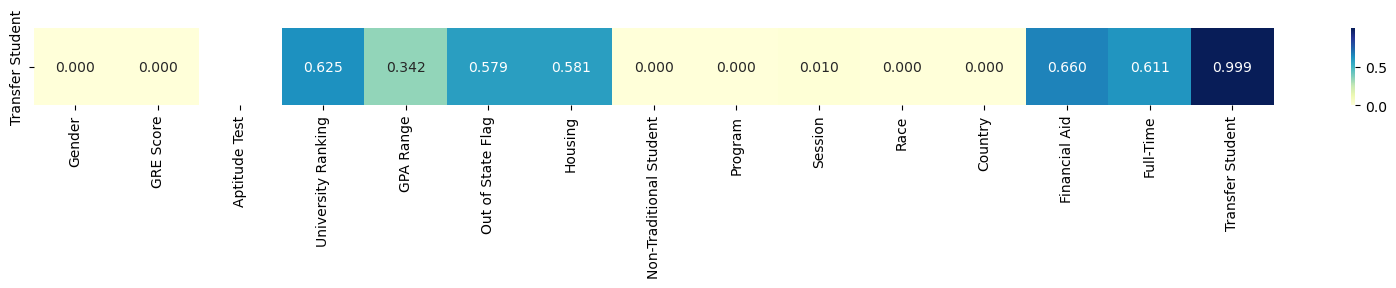

In [28]:
print("**Cramers V Heatmap on all Features and Target: Transfer Student**")
cramers_v_val = pd.DataFrame(index=['Transfer Student'], columns=sliced_higher_edu_df.columns)

for j in range(len(sliced_higher_edu_df.columns)):
    u = cramers_v(sliced_higher_edu_df['Transfer Student'], sliced_higher_edu_df[sliced_higher_edu_df.columns[j]])
    cramers_v_val.loc[:,sliced_higher_edu_df.columns[j]] = u

cramers_v_val.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(cramers_v_val,annot=True,fmt='.3f', cmap="YlGnBu")
plt.show()

# Encoding

In [30]:
target = sliced_higher_edu_df['Transfer Student'].copy()
features = sliced_higher_edu_df[
    ['University Ranking', 'GPA Range', 'Out of State Flag', 'Housing', 'Financial Aid', 'Full-Time']
].copy()

In [31]:
features = pd.get_dummies(features)
features.head(5)

,University Ranking_Bottom Half,University Ranking_Bottom Quarter,University Ranking_Pass,University Ranking_Top 10,University Ranking_Top Half,University Ranking_Top Quarter,GPA Range_1.0-1.99,GPA Range_2.0-2.49,GPA Range_2.50-2.99,GPA Range_3.00-3.24,...,GPA Range_3.50-3.74,GPA Range_3.75+,Out of State Flag_No,Out of State Flag_Yes,Housing_College Owned/Operated,Housing_Off-Campus,Financial Aid_No,Financial Aid_Yes,Full-Time_No,Full-Time_Yes
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
1,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1


In [32]:
target.replace('No', 0, inplace=True)
target.replace('Yes', 1, inplace=True)
target

0       0
1       0
2       0
3       0
4       0
       ..
3878    0
3879    0
3880    0
3881    1
3882    0
Name: Transfer Student, Length: 3883, dtype: int64

# Machine Learning Models

In [33]:
features.head()

,University Ranking_Bottom Half,University Ranking_Bottom Quarter,University Ranking_Pass,University Ranking_Top 10,University Ranking_Top Half,University Ranking_Top Quarter,GPA Range_1.0-1.99,GPA Range_2.0-2.49,GPA Range_2.50-2.99,GPA Range_3.00-3.24,...,GPA Range_3.50-3.74,GPA Range_3.75+,Out of State Flag_No,Out of State Flag_Yes,Housing_College Owned/Operated,Housing_Off-Campus,Financial Aid_No,Financial Aid_Yes,Full-Time_No,Full-Time_Yes
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
1,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1


In [34]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Transfer Student, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)
print(features.shape, target.shape)
display(X_train.head())
display(y_train.head())

(3883, 21) (3883,)


,University Ranking_Bottom Half,University Ranking_Bottom Quarter,University Ranking_Pass,University Ranking_Top 10,University Ranking_Top Half,University Ranking_Top Quarter,GPA Range_1.0-1.99,GPA Range_2.0-2.49,GPA Range_2.50-2.99,GPA Range_3.00-3.24,...,GPA Range_3.50-3.74,GPA Range_3.75+,Out of State Flag_No,Out of State Flag_Yes,Housing_College Owned/Operated,Housing_Off-Campus,Financial Aid_No,Financial Aid_Yes,Full-Time_No,Full-Time_Yes
3792,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
162,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
1848,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,1
856,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,1,0
1970,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,1,0


3792    0
162     0
1848    0
856     1
1970    1
Name: Transfer Student, dtype: int64

### Logistic Regression, KNN, Random Forest, Decision Tree

+ ==================================================================================================== +
			1-For Logistic Regression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9356499356499357
--------------------------------------------------
F1 :  [0.95247148 0.90039841]
--------------------------------------------------
Reacll :  [0.96531792 0.87596899]
--------------------------------------------------
Precision :  [0.93996248 0.92622951]
--------------------------------------------------
Confusion Matrix....
 [[501  18]
 [ 32 226]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       519
           1       0.93      0.88      0.90       258

    accuracy                           0.94       777
   macro avg       0.93      0.92      0.93       777
we

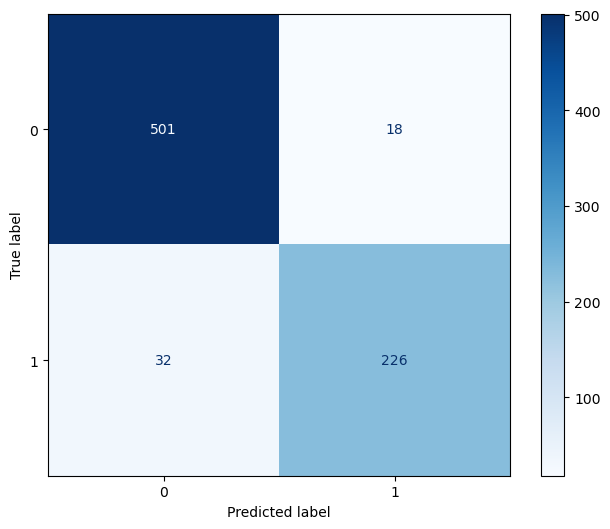

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 0.518 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For K Neighbors Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9472329472329473
--------------------------------------------------
F1 :  [0.96113744 0.91783567]
--------------------------------------------------
Reacll :  [0.97687861 0.8875969 ]
--------------------------------------------------
Precision :  [0.94589552 0.95020747]
--------------------------------------------------
Confusion Matrix....
 [[507  12]
 [ 29 229]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0  

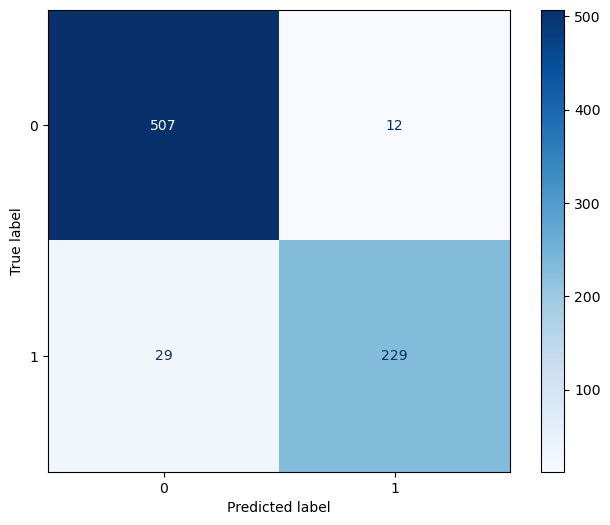

							-----------------------------------------------------------
							 Time for detection (KNeighborsClassifier) : 0.276 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For Random Forest Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9485199485199485
--------------------------------------------------
F1 :  [0.96190476 0.92063492]
--------------------------------------------------
Reacll :  [0.97302505 0.89922481]
--------------------------------------------------
Precision :  [0.95103578 0.94308943]
--------------------------------------------------
Confusion Matrix....
 [[505  14]
 [ 26 232]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

          

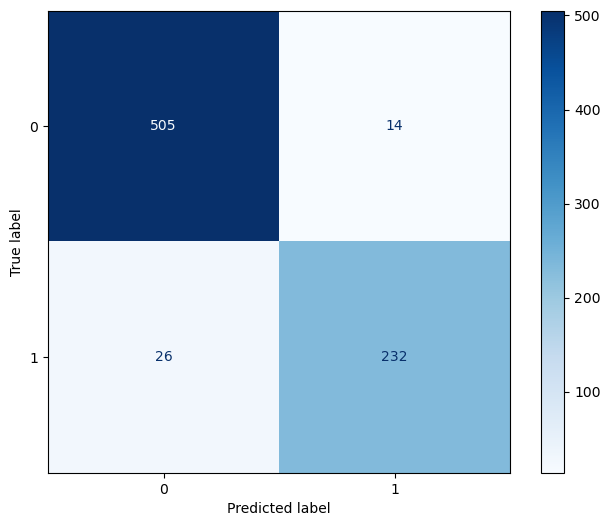

							-----------------------------------------------------------
							 Time for detection (RandomForestClassifier) : 0.767 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Decision Tree Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9498069498069498
--------------------------------------------------
F1 :  [0.96282173 0.92277228]
--------------------------------------------------
Reacll :  [0.97302505 0.90310078]
--------------------------------------------------
Precision :  [0.95283019 0.94331984]
--------------------------------------------------
Confusion Matrix....
 [[505  14]
 [ 25 233]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

        

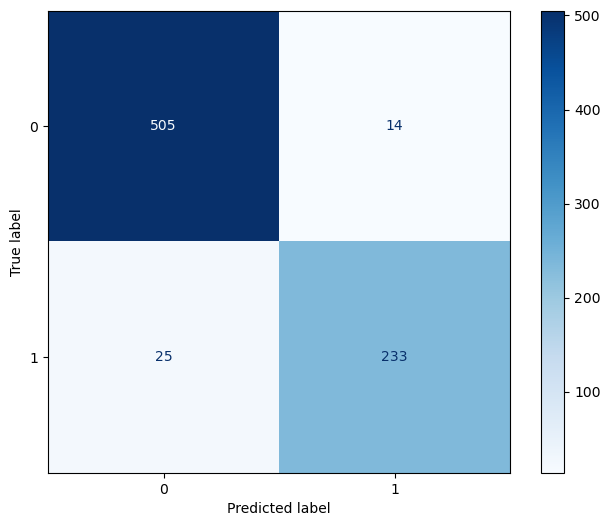

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 0.458 seconds...
							-----------------------------------------------------------



,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,Logistic Regression,0.935650,"[0.9399624765478424, 0.9262295081967213]","[0.9653179190751445, 0.875968992248062]","[0.9524714828897339, 0.9003984063745021]","[[501, 18], [32, 226]]"
1,K Neighbors Classifier,0.947233,"[0.9458955223880597, 0.950207468879668]","[0.976878612716763, 0.8875968992248062]","[0.9611374407582938, 0.9178356713426853]","[[507, 12], [29, 229]]"
2,Random Forest Classifier,0.948520,"[0.9510357815442562, 0.943089430894309]","[0.9730250481695568, 0.8992248062015504]","[0.9619047619047618, 0.9206349206349207]","[[505, 14], [26, 232]]"
3,Decision Tree Classifier,0.949807,"[0.9528301886792453, 0.9433198380566802]","[0.9730250481695568, 0.9031007751937985]","[0.9628217349857006, 0.9227722772277228]","[[505, 14], [25, 233]]"


In [36]:
# check the performance on diffrent Classifiers
custom_models = ['Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier']
models = []
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))


# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []
pred = []

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    pred.append(clf)
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {custom_models[i-1]} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    disp= ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
pd.DataFrame({"Model": custom_models, "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})

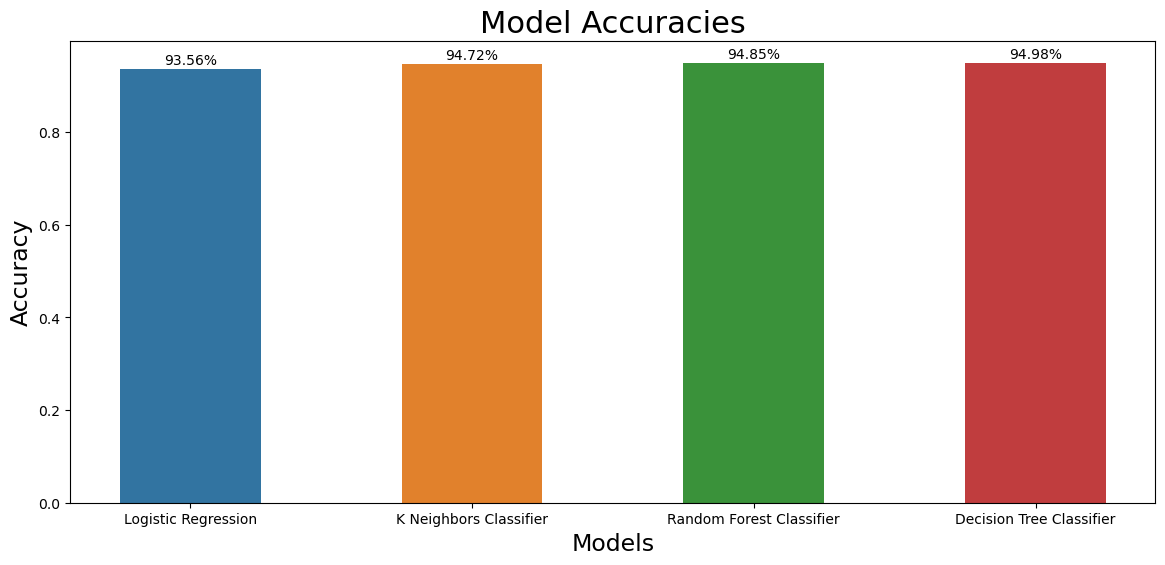

In [37]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+0.01, str(round(y[i]*100, 2)) + '%', ha = 'center')

plt.figure(figsize=(14, 6))
plt.bar(custom_models, acc, color=['#3274a1','#e1812c','#3a923a','#c03d3e'], width=0.5)
addlabels(custom_models, acc)

plt.title("Model Accuracies", fontsize=22)
plt.xlabel("Models", fontsize=17)
plt.ylabel("Accuracy", fontsize=17)
plt.show()

## Future Predictions

In [38]:
print("Please Enter the following information:")
print("="*100)

# University Ranking
print("Please tell us about University Ranking: ")
print("1- Bottom half \n2- Bottom Quarter \n3- Top 10 \n4- Top Half \n5- Top Quarter \n6- Pass")
high_school_ranking = int(input("Enter an integer between 1 to 6: "))
if high_school_ranking == 1:
    high_school_ranking = "Bottom Half"
elif high_school_ranking == 2:
    high_school_ranking = "Bottom Quarter"
elif high_school_ranking == 3:
    high_school_ranking = "Top 10"
elif high_school_ranking == 4:
    high_school_ranking = "Top Half"
elif high_school_ranking == 5:
    high_school_ranking = "Top Quarter"
elif high_school_ranking == 6:
    high_school_ranking = "Pass"
else:
    print("Please Enter the Number between 1-6... :)")
print()

# GPA Range
print("Please tell us about GPA Range: ")
print("1- 1.0-1.99 \n2- 2.0-2.49 \n3- 2.50-2.99 \n4- 3.00-3.24 \n5- 3.25-3.49 \n6- 3.50-3.74 \n7- 3.75+")
gpa_range = int(input("Enter an integer between 1 to 7: "))
if gpa_range == 1:
    gpa_range = "1.0-1.99"
elif gpa_range == 2:
    gpa_range = "2.0-2.49"
elif gpa_range == 3:
    gpa_range = "2.50-2.99"
elif gpa_range == 4:
    gpa_range = "3.00-3.24"
elif gpa_range == 5:
    gpa_range = "3.25-3.49"
elif gpa_range == 6:
    gpa_range = "3.50-3.74"
elif gpa_range == 7:
    gpa_range = "3.75+"
else:
    print("Please Enter the Number between 1-7... :)")
print()    
    
# Out of School State Flag
print("Please tell us about Out of School State Flag: ")
print("1- Yes \n2- No")
out_of_school_state_flag = int(input("Enter an integer either 1 or 2: "))
if out_of_school_state_flag == 1:
    out_of_school_state_flag = "Yes"
elif out_of_school_state_flag == 2:
    out_of_school_state_flag = "No"
else:
    print("Please Enter the Number Either 1 or 2... :)")
print()
    
# Housing
print("Please tell us about Housing/ Residence: ")
print("1- Off-Campus \n2- College Owned/Operated")
housing = int(input("Enter an integer either 1 or 2: "))
if housing == 1:
    housing = "Off-Campus"
elif housing == 2:
    housing = "College Owned/Operated"
else:
    print("Please Enter the Number Either 1 or 2... :)")
print()

# Financial Aid
print("Please tell us about Financial Aid: ")
print("1- Yes \n2- No")
financial_aid = int(input("Enter an integer either 1 or 2: "))
if financial_aid == 1:
    financial_aid = "Yes"
elif financial_aid == 2:
    financial_aid = "No"
else:
    print("Please Enter the Number Either 1 or 2... :)")
print()

# Full Time
print("Please tell us about Full Time Enrollment: ")
print("1- Yes \n2- No")
full_time = int(input("Enter an integer either 1 or 2: "))
if full_time == 1:
    full_time = "Yes"
elif full_time == 2:
    full_time = "No"
else:
    print("Please Enter the Number Either 1 or 2... :)")
print()

print("="*100)

Please Enter the following information:
Please tell us about University Ranking: 
1- Bottom half 
2- Bottom Quarter 
3- Top 10 
4- Top Half 
5- Top Quarter 
6- Pass


Enter an integer between 1 to 6:  1



Please tell us about GPA Range: 
1- 1.0-1.99 
2- 2.0-2.49 
3- 2.50-2.99 
4- 3.00-3.24 
5- 3.25-3.49 
6- 3.50-3.74 
7- 3.75+


Enter an integer between 1 to 7:  1



Please tell us about Out of School State Flag: 
1- Yes 
2- No


Enter an integer either 1 or 2:  1



Please tell us about Housing/ Residence: 
1- Off-Campus 
2- College Owned/Operated


Enter an integer either 1 or 2:  1



Please tell us about Financial Aid: 
1- Yes 
2- No


Enter an integer either 1 or 2:  1



Please tell us about Full Time Enrollment: 
1- Yes 
2- No


Enter an integer either 1 or 2:  1


In [39]:
val = [0 for x in range(len(features.columns))]
val = np.array(val)
final_pred_df = pd.DataFrame(val.reshape(1, -1) ,columns=features.columns)

In [40]:
my_dict = {
    "High School Ranking": [high_school_ranking],
    "GPA Range": [gpa_range],
    "Out of State Flag": [out_of_school_state_flag],
    "Housing": [housing],
    "Financial Aid": [financial_aid],
    "Full-Time": [full_time]
}
my_pred_df = pd.DataFrame(my_dict)
my_pred_df = pd.get_dummies(my_pred_df)
for x in my_pred_df.columns:
    for y in final_pred_df.columns:
        if x == y:
            final_pred_df[y][0] = my_pred_df[x][0] 
            break

In [41]:
print("Please select which Model you want to use for prediction: ")
print("1- Logistic Regression \n2- K Nearest Neighbor \n3- Random Forest \n4- Decision Tree")
model_selection = int(input("Enter an integer from 1-4: "))

if model_selection > 4:
    print("Please Enter the valid integer between 1-4")

x = int(pred[model_selection-1].predict(final_pred_df))
print("="*100)
if x == 0:
    print("!The Student will not Transfer!")
elif x == 1:
    print("!The Student will Transfer!")
print("="*100)

Please select which Model you want to use for prediction: 
1- Logistic Regression 
2- K Nearest Neighbor 
3- Random Forest 
4- Decision Tree


Enter an integer from 1-4:  1


!The Student will not Transfer!
